# Data Input

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import random

# Set the seed
random.seed(19)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_normalized = pd.read_csv("/content/drive/My Drive/DataThesis/BETN073/working_data.csv")

data = pd.read_csv("/content/drive/My Drive/DataThesis/BETN073/normal_data.csv")

In [3]:
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

In [4]:
data['Season'] = data['Month'].apply(lambda x:
                                     1 if (x == 12 or x <= 2) else
                                     2 if (x >= 3 and x <= 5) else
                                     3 if (x >= 6 and x <= 8) else
                                     4 if (x >= 9 and x <= 11) else None)

In [5]:
# List of holiday dates with months and days
holiday_dates = {
    (1, 1),   # New Year's Day
    (1, 6),   # Epiphany
    (2, 14),  # Valentine's Day
    (3, 20),  # March Equinox
    (3, 29),  # Good Friday
    (3, 31),  # Easter Sunday
    (4, 1),   # Easter Monday
    (5, 1),   # Labor Day / May Day
    (5, 8),   # Iris Day (Brussels Regional holiday)
    (5, 9),   # Ascension Day
    (5, 10),  # Day after Ascension Day
    (5, 12),  # Mothers' Day
    (5, 19),  # Whit Sunday
    (5, 20),  # Whit Monday
    (6, 9),   # Fathers' Day
    (6, 20),  # June Solstice
    (7, 11),  # Day of the Flemish Community (Regional holiday in some provinces)
    (7, 21),  # Belgian National Day
    (8, 15),  # Assumption of Mary
    (9, 15),  # Day of the Walloon Region (Regional holiday in Namur)
    (9, 22),  # September Equinox
    (9, 27),  # Day of the French Community (Regional holiday in some provinces)
    (10, 27), # Daylight Saving Time ends
    (10, 31), # Halloween
    (11, 1),  # All Saints' Day
    (11, 11), # Armistice Day
    (11, 15), # Day of the German-speaking Community (Regional holiday in Liège)
    (12, 6),  # St. Nicholas Day
    (12, 21), # December Solstice
    (12, 24), # Christmas Eve
    (12, 25), # Christmas Day
    (12, 26), # Boxing Day
    (12, 31)  # New Year's Eve
}

# Create a new column 'IsHoliday' and set it to 1 for holidays, 0 otherwise
data['IsHoliday'] = data.apply(lambda row: 1 if (row['Month'], row['Day']) in holiday_dates else 0, axis=1)

In [6]:
data

,Year,Month,Day,Concentration,DayOfWeek,Weekend,Date,Season,IsHoliday
0,2008,1,1,18.5000,2,0,2008-01-01,1,1
1,2008,1,2,46.1250,3,0,2008-01-02,1,0
2,2008,1,3,38.2500,4,0,2008-01-03,1,0
3,2008,1,4,33.1250,5,0,2008-01-04,1,0
4,2008,1,5,68.2500,6,1,2008-01-05,1,0
...,...,...,...,...,...,...,...,...,...
4349,2019,12,27,45.2500,5,0,2019-12-27,1,0
4350,2019,12,28,42.1250,6,1,2019-12-28,1,0
4351,2019,12,29,32.8750,0,1,2019-12-29,1,0
4352,2019,12,30,41.6875,1,0,2019-12-30,1,0


# Graphs for Grouped Data

## **Day Graphs (number)**

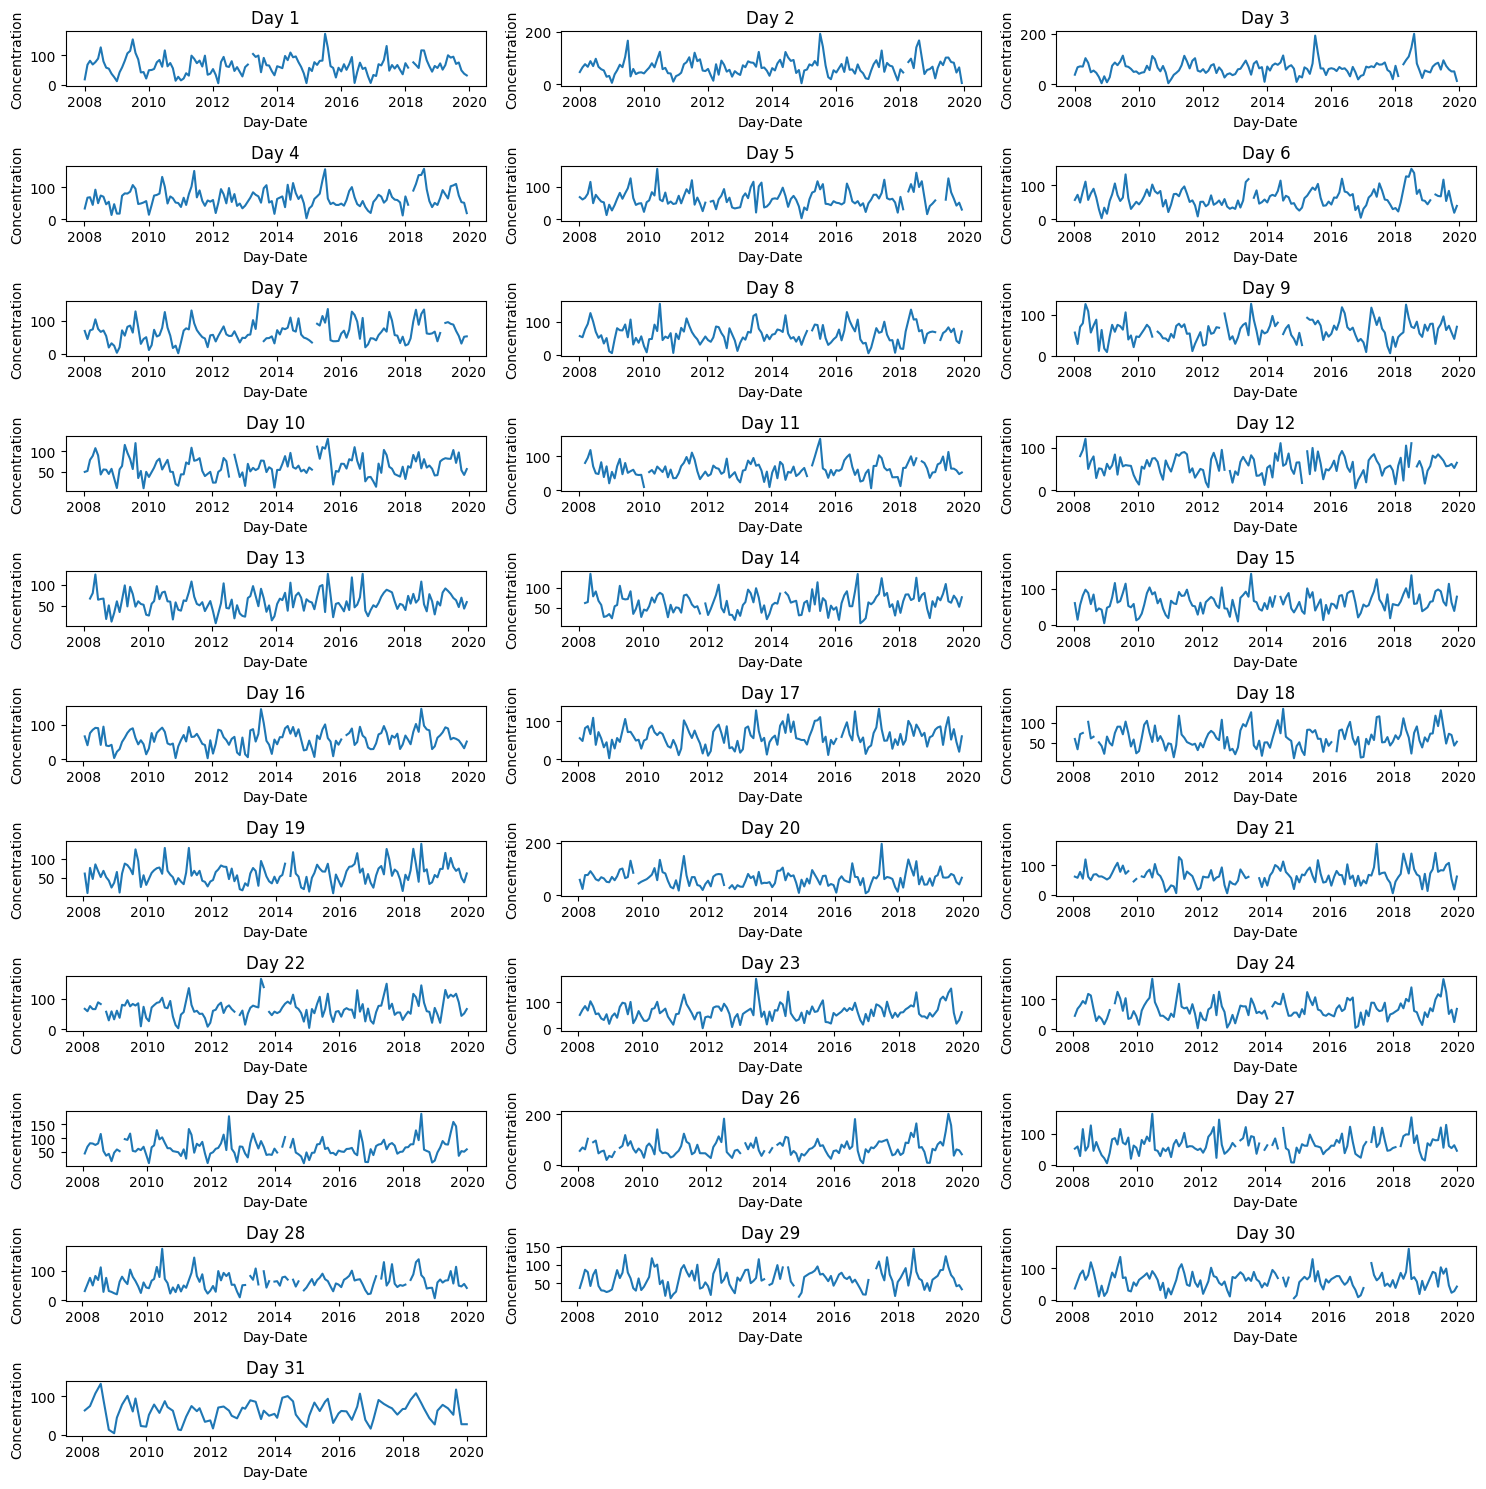

In [7]:
grouped_data = data.groupby(data['Day'])

# Get the number of days in the month
num_days = len(grouped_data)

# Define the number of columns for subplots (e.g., 4 columns for 31 days)
num_cols = 3

# Calculate the number of rows needed for subplots
num_rows = (num_days + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if num_rows > 1
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate over each group and plot the data
for i, (day, group) in enumerate(grouped_data):
    ax = axs[i]
    ax.plot(group['Date'], group['Concentration'])
    ax.set_title(f'Day {day}')
    ax.set_xlabel('Day-Date')
    ax.set_ylabel('Concentration')

# Hide empty subplots
for j in range(num_days, num_cols * num_rows):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## **Month Graphs**

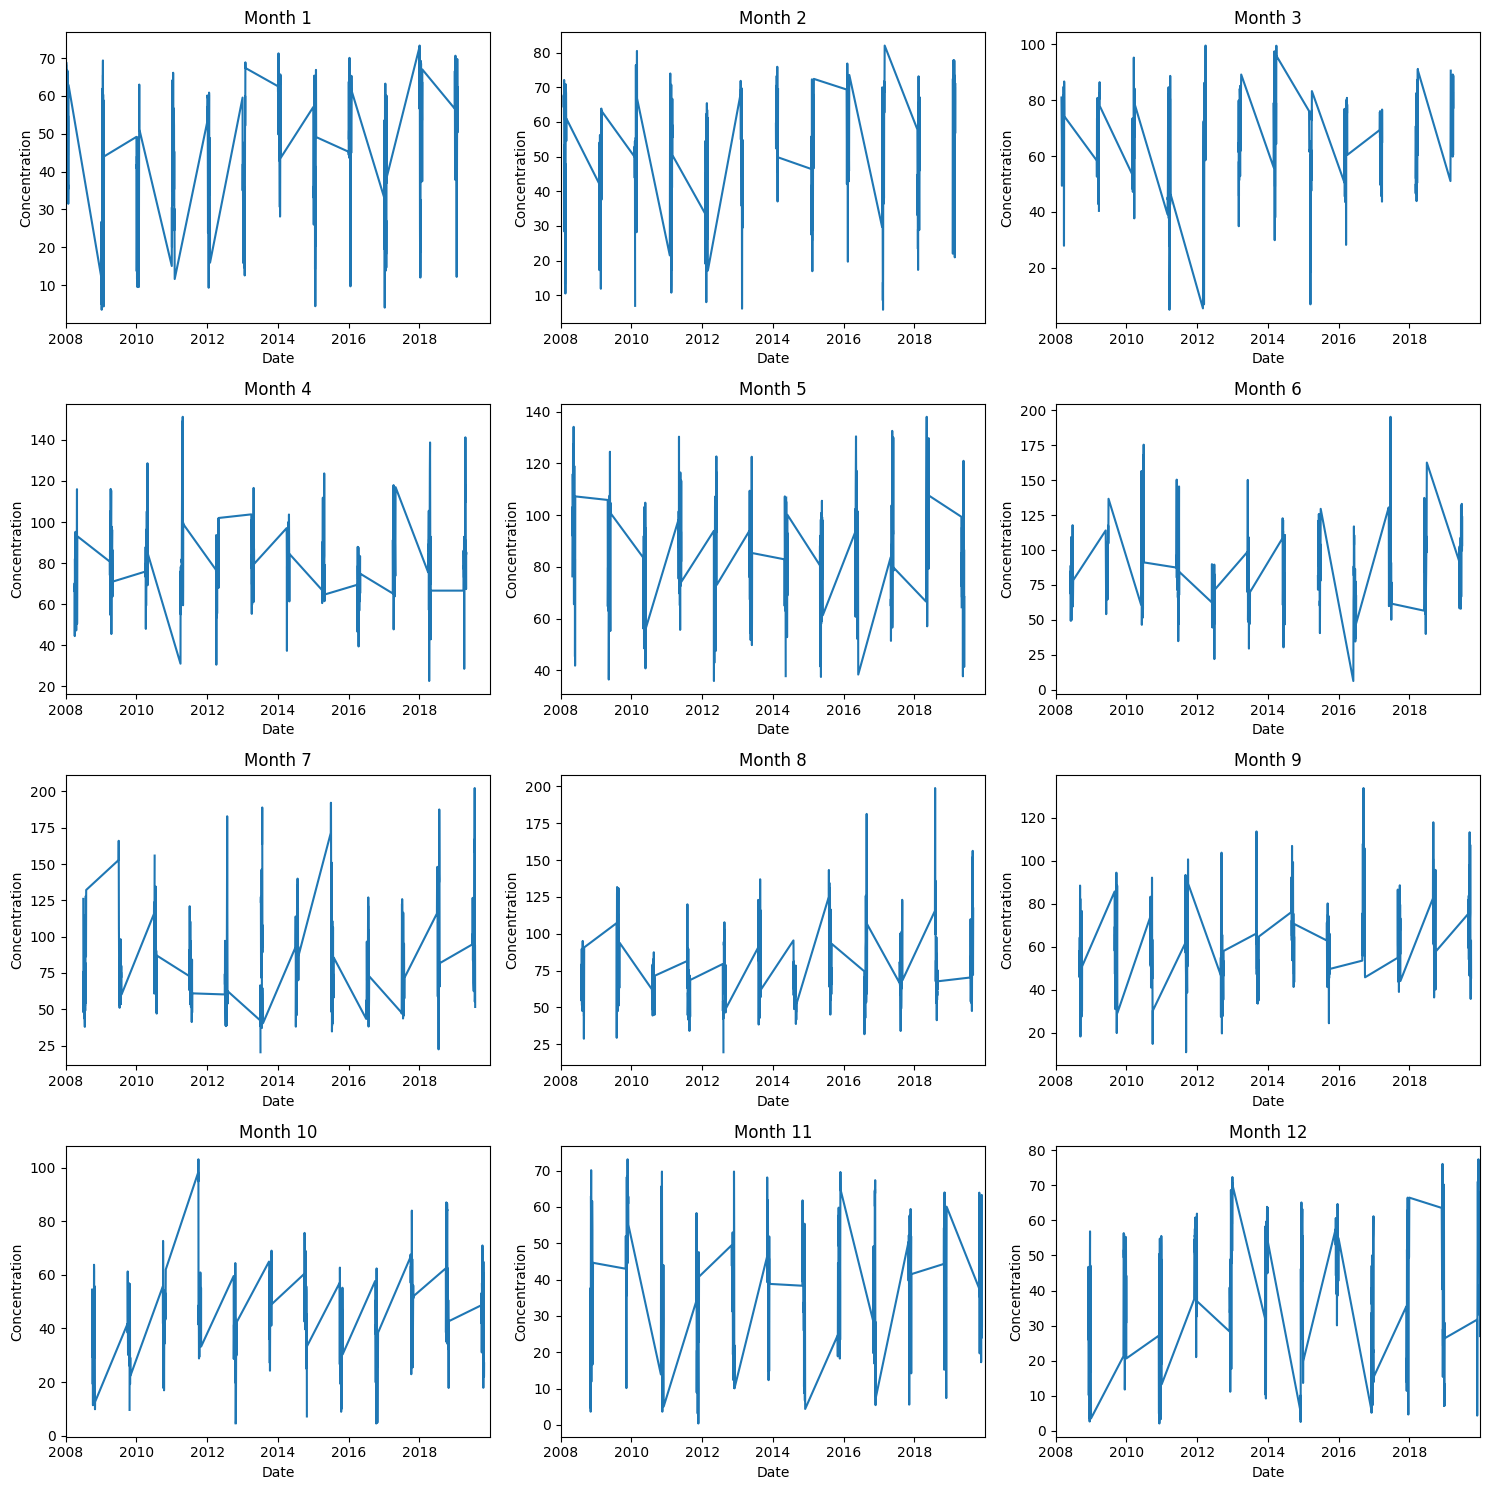

In [8]:
grouped_data = data.groupby(data['Month'])

# Get the number of days in the month
num_days = len(grouped_data)

# Define the number of columns for subplots (e.g., 4 columns for 31 days)
num_cols = 3

# Calculate the number of rows needed for subplots
num_rows = (num_days + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if num_rows > 1
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate over each group and plot the data
for i, (day, group) in enumerate(grouped_data):
    ax = axs[i]
    interval_width = 1 / (len(group) + 1)
    ax.plot(group['Date'], group['Concentration'])
    ax.set_title(f'Month {day}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Concentration')

    #ax.set_xticks(group['Date'].dt.year.unique())
    ax.set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2019-12-31'))

# Hide empty subplots
for j in range(num_days, num_cols * num_rows):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## **Year Graphs**

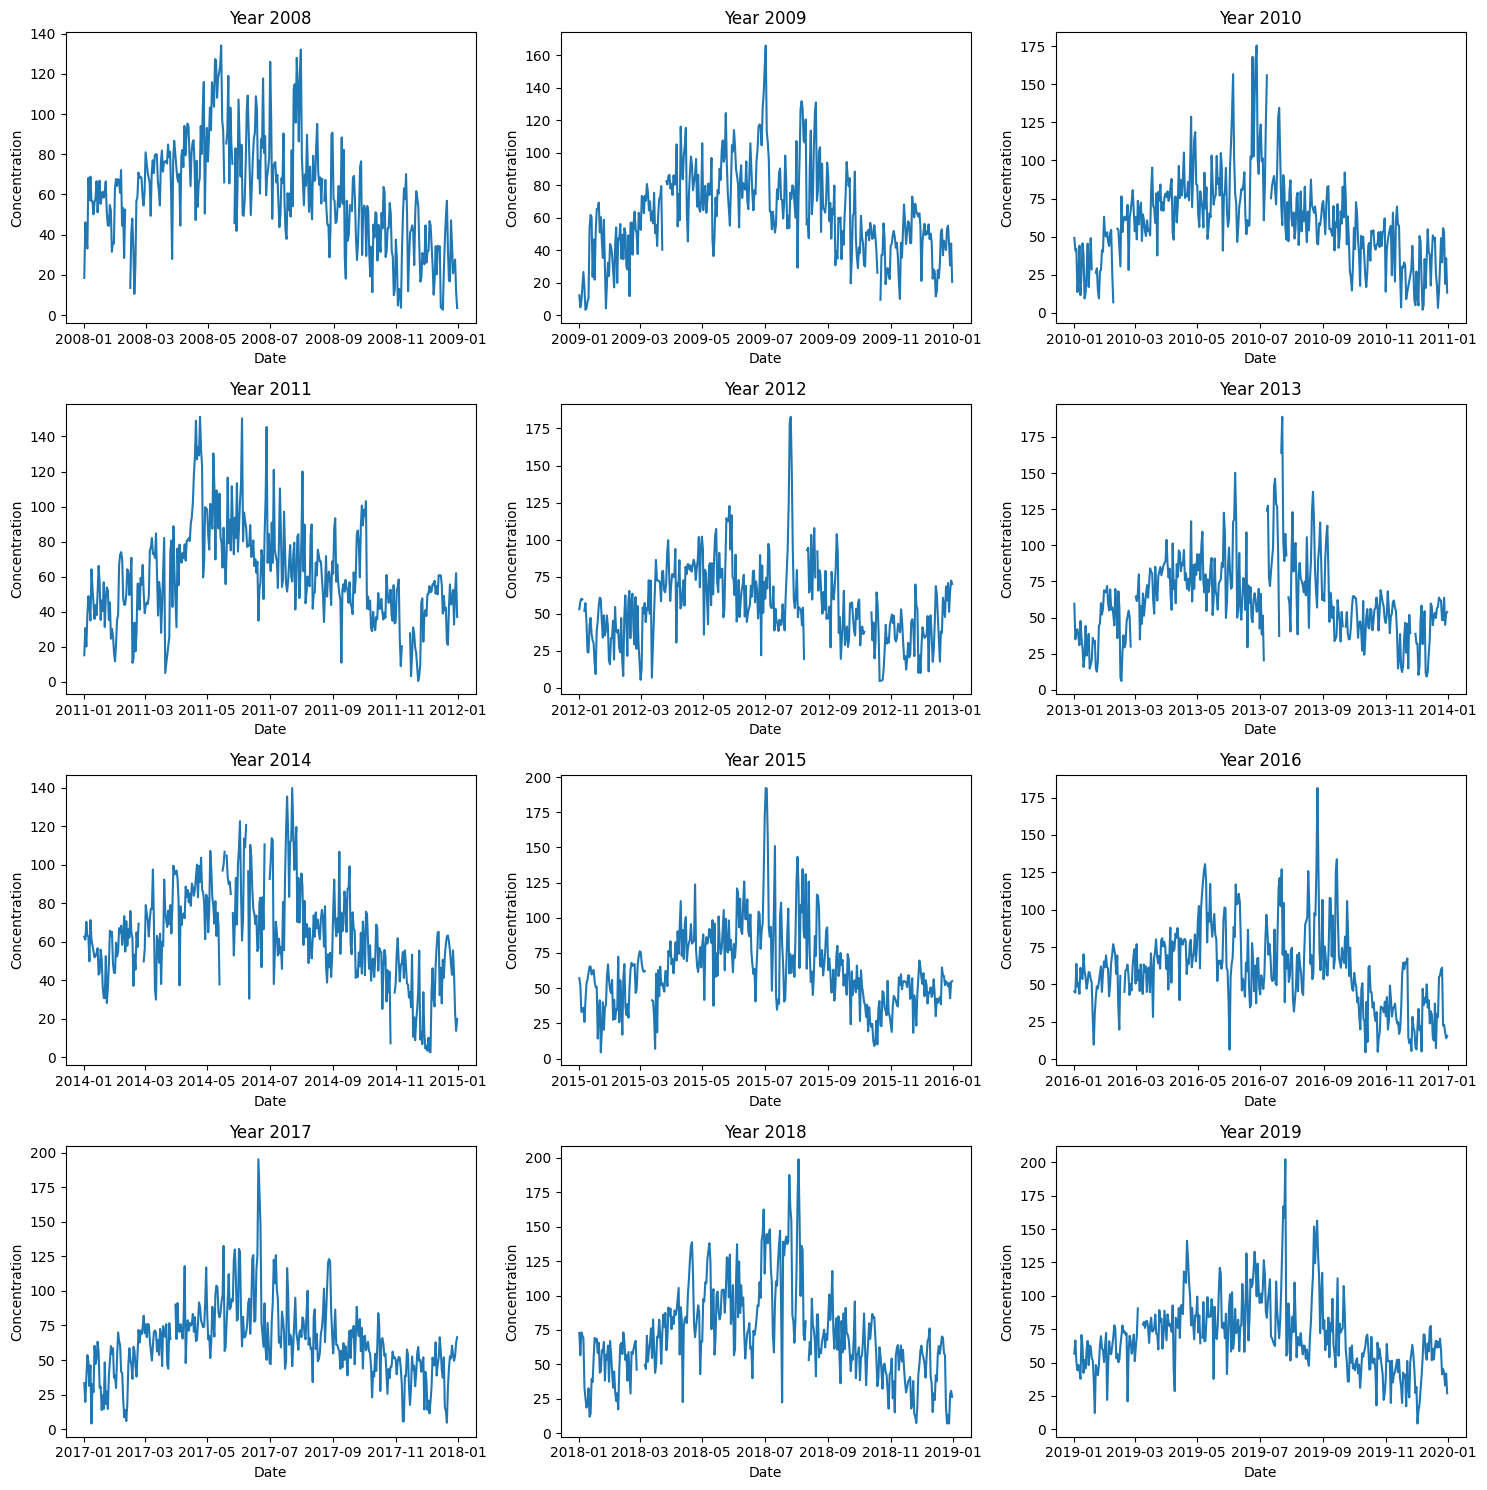

In [9]:
grouped_data = data.groupby(data['Date'].dt.year)

# Get the number of days in the month
num_days = len(grouped_data)

# Define the number of columns for subplots (e.g., 4 columns for 31 days)
num_cols = 3

# Calculate the number of rows needed for subplots
num_rows = (num_days + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if num_rows > 1
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate over each group and plot the data
for i, (day, group) in enumerate(grouped_data):
    ax = axs[i]
    ax.plot(group['Date'], group['Concentration'])
    ax.set_title(f'Year {day}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Concentration')

# Hide empty subplots
for j in range(num_days, num_cols * num_rows):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## **Graphs for each Day: Monday (0) -> Sunday (6)**

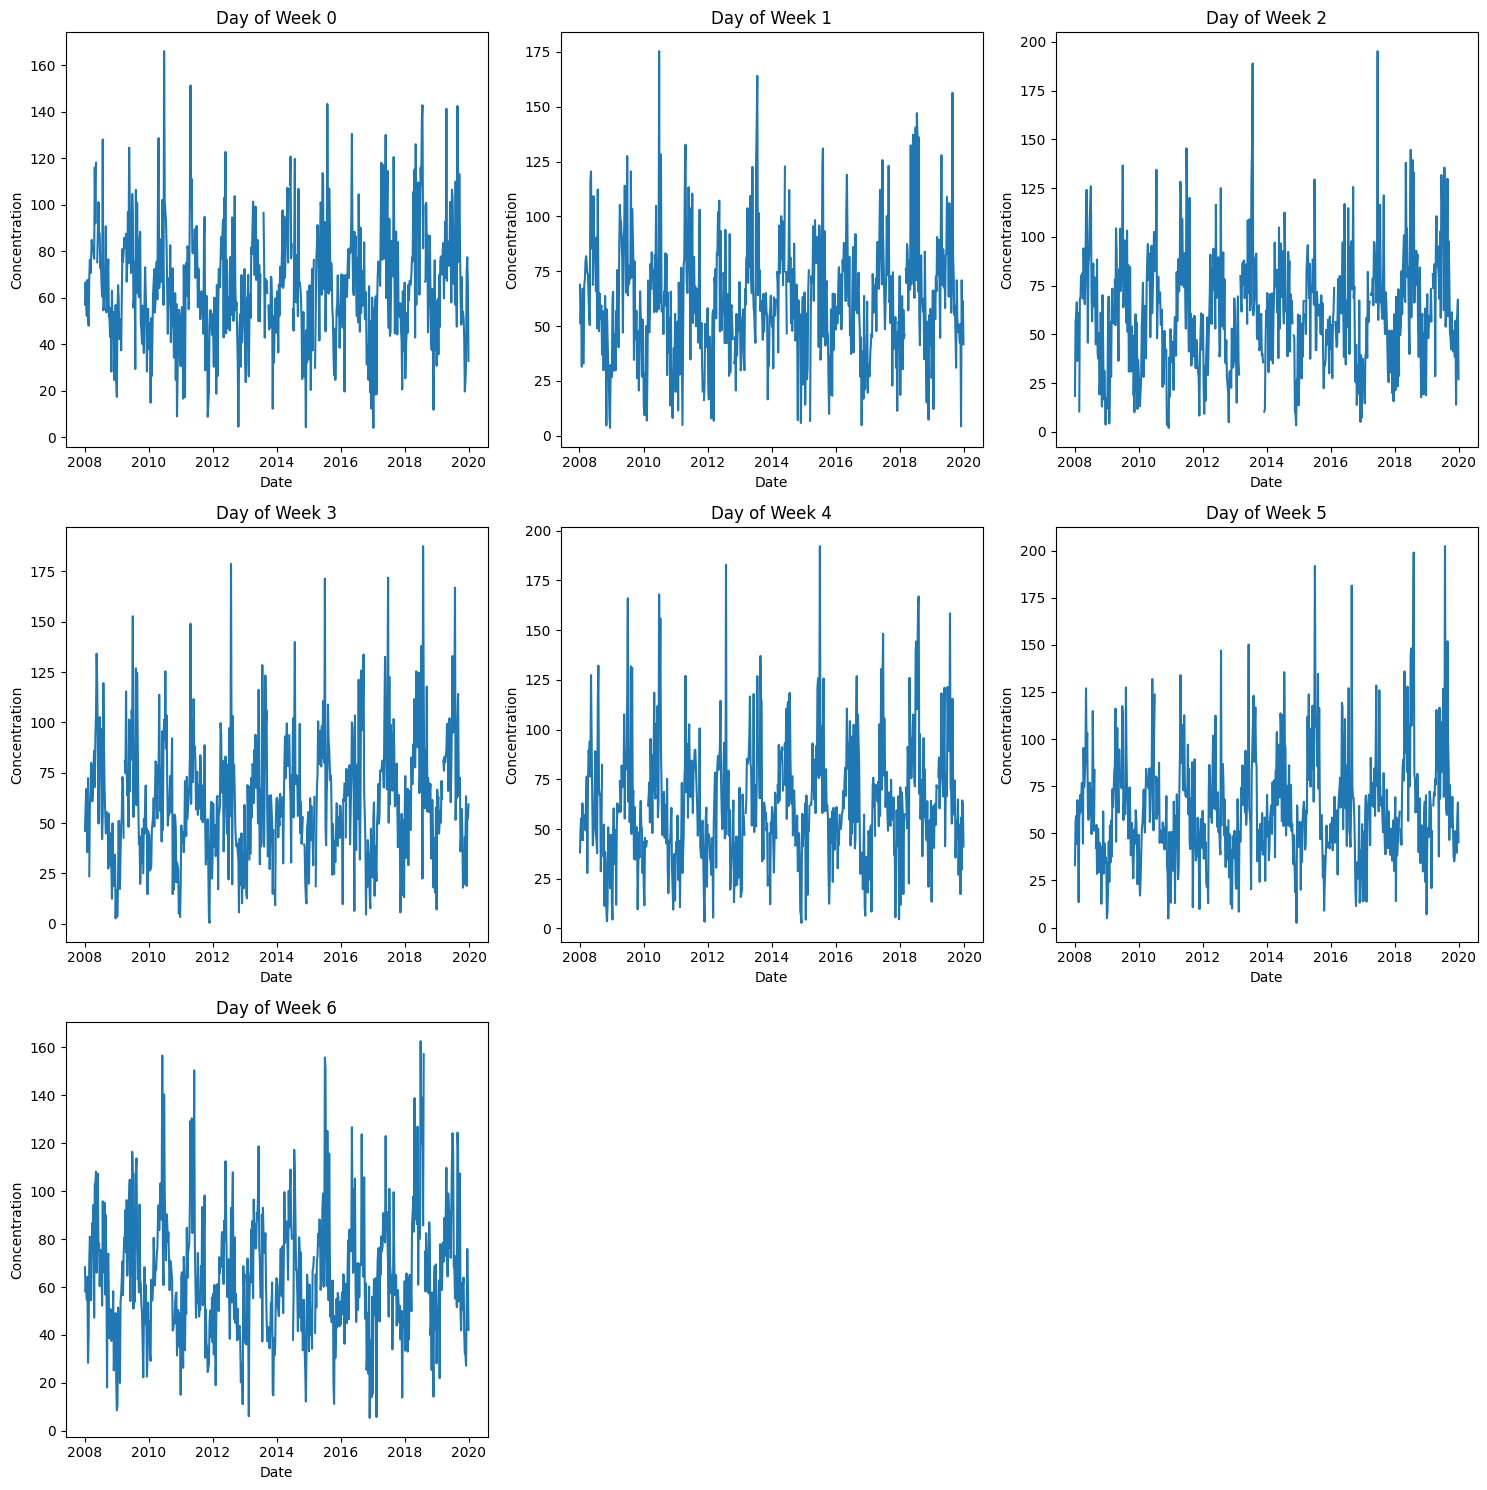

In [10]:
grouped_data = data.groupby(data['DayOfWeek'])

# Get the number of days in the month
num_days = len(grouped_data)

# Define the number of columns for subplots (e.g., 4 columns for 31 days)
num_cols = 3

# Calculate the number of rows needed for subplots
num_rows = (num_days + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if num_rows > 1
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate over each group and plot the data
for i, (day, group) in enumerate(grouped_data):
    ax = axs[i]
    ax.plot(group['Date'], group['Concentration'])
    ax.set_title(f'Day of Week {day}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Concentration')

# Hide empty subplots
for j in range(num_days, num_cols * num_rows):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Outlier Detection & Analysis

In [11]:
describe_full = data['Concentration'].describe()
describe_full

count    4274.000000
mean       63.185994
std        27.941785
min         0.375000
25%        45.312500
50%        60.937500
75%        78.437500
max       202.312500
Name: Concentration, dtype: float64

In [12]:
concentration_values = data['Concentration']

In [13]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = concentration_values.quantile(0.25)
Q3 = concentration_values.quantile(0.75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# Boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((concentration_values < lower_bound) | (concentration_values > upper_bound)).sum()

# Print the count
print("Number of outliers in 'column_name':", outliers_count)

Number of outliers in 'column_name': 98


In [14]:
outlier_indices = concentration_values[(concentration_values < lower_bound) | (concentration_values > upper_bound)].index

# Remove the outliers from the DataFrame
char_ozone_clean_IQR = data.drop(outlier_indices)

# Here I reset index
char_ozone_clean_IQR.reset_index(drop=True, inplace=True)

In [15]:
describe_IQR = char_ozone_clean_IQR['Concentration'].describe()

In [16]:
# Calculate mean and standard deviation
mean = concentration_values.mean()
std_dev = concentration_values.std()

# Calculate Z-scores
z_scores = (concentration_values - mean) / std_dev

# Define the threshold for outliers
threshold = 3  # Adjust as needed based on your requirements

# Get the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

print("Number of outliers in 'Concentrations' using Z-score:", len(outlier_indices))

# Remove the outliers from the DataFrame
char_ozone_clean_zscore = data.drop(outlier_indices)

# Index Reset
char_ozone_clean_zscore.reset_index(drop=True, inplace=True)

Number of outliers in 'Concentrations' using Z-score: 38


In [17]:
describe_zscore = char_ozone_clean_zscore['Concentration'].describe()

In [18]:
describe_full = pd.DataFrame(describe_full)
describe_IQR = pd.DataFrame(describe_IQR)
describe_zscore = pd.DataFrame(describe_zscore)

comparison = pd.concat([describe_full['Concentration'], describe_IQR['Concentration'], describe_zscore['Concentration']], axis=1)
comparison.columns = ['Full Data', 'IQR Outlier Removal', 'Z-score Outlier Removal']

comparison

,Full Data,IQR Outlier Removal,Z-score Outlier Removal
count,4274.000000,4176.000000,4236.000000
mean,63.185994,61.202676,62.256920
std,27.941785,24.886897,26.236371
min,0.375000,0.375000,0.375000
25%,45.312500,44.984375,45.125000
50%,60.937500,60.375000,60.750000
75%,78.437500,76.875000,77.750000
max,202.312500,128.000000,146.937500


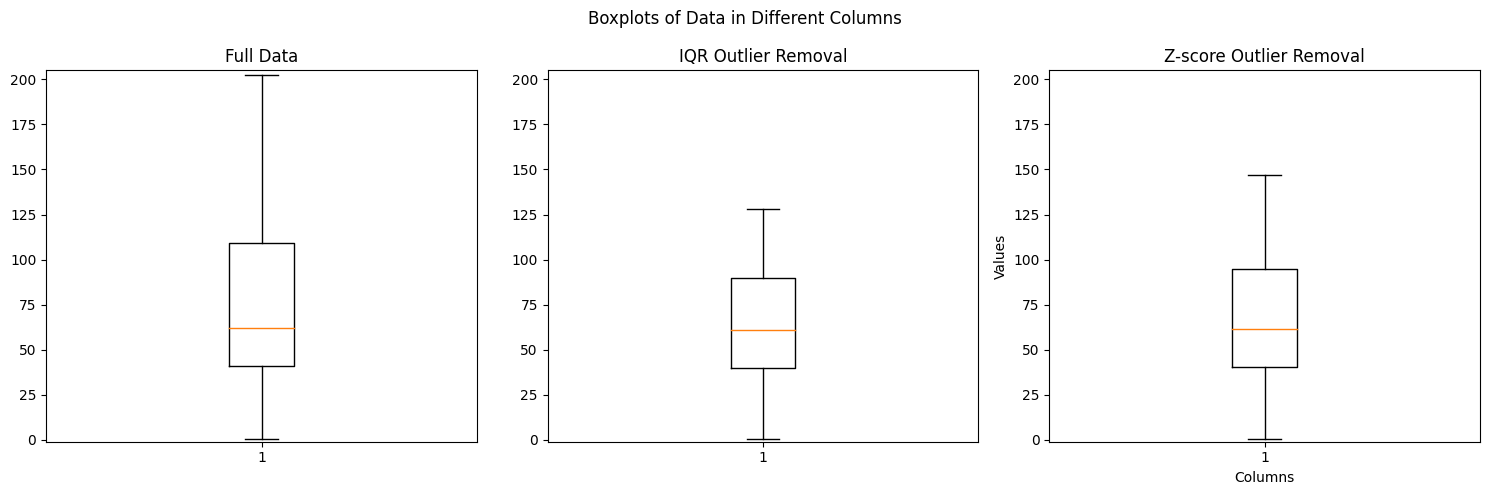

In [19]:
columns_to_plot = ['Full Data', 'IQR Outlier Removal', 'Z-score Outlier Removal']

# Create a figure and axis object
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot boxplots
for i, column in enumerate(columns_to_plot):
    axs[i].boxplot(comparison[column])
    axs[i].set_title(column)

    # Set y-axis limits
    axs[i].set_ylim(-1, 205)  # Adjust the limits as needed

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.suptitle('Boxplots of Data in Different Columns')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Grouping for each 'DayOfWeek'

In [20]:
data_monday = data[data['DayOfWeek'] == 0]
data_tuesday = data[data['DayOfWeek'] == 1]
data_wednesday = data[data['DayOfWeek'] == 2]
data_thursday = data[data['DayOfWeek'] == 3]
data_friday = data[data['DayOfWeek'] == 4]
data_saturday = data[data['DayOfWeek'] == 5]
data_sunday = data[data['DayOfWeek'] == 6]

In [21]:
describe_monday = data_monday['Concentration'].describe()
describe_tuesday = data_tuesday['Concentration'].describe()
describe_wednesday = data_wednesday['Concentration'].describe()
describe_thursday = data_thursday['Concentration'].describe()
describe_friday = data_friday['Concentration'].describe()
describe_saturday = data_saturday['Concentration'].describe()
describe_sunday = data_sunday['Concentration'].describe()

In [22]:
describe_monday = pd.DataFrame(describe_monday)
describe_tuesday = pd.DataFrame(describe_tuesday)
describe_wednesday = pd.DataFrame(describe_wednesday)
describe_thursday = pd.DataFrame(describe_thursday)
describe_friday = pd.DataFrame(describe_friday)
describe_saturday = pd.DataFrame(describe_saturday)
describe_sunday = pd.DataFrame(describe_sunday)

comparison = pd.concat([describe_monday['Concentration'], describe_tuesday['Concentration'], describe_wednesday['Concentration'], describe_thursday['Concentration'], describe_friday['Concentration'], describe_saturday['Concentration'], describe_sunday['Concentration']], axis=1)
comparison.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

comparison

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,611.000000,613.000000,608.000000,606.000000,602.000000,616.000000,618.000000
mean,65.667553,61.883462,61.870066,61.950495,62.869809,63.016741,65.007383
std,24.832908,27.279728,28.581362,29.780166,29.986554,28.981675,25.658768
min,4.062500,3.625000,2.062500,0.375000,2.812500,2.500000,5.437500
25%,50.406250,45.125000,41.234375,42.765625,44.937500,44.546875,48.250000
50%,63.750000,60.437500,60.406250,59.562500,59.593750,59.656250,62.875000
75%,80.000000,76.187500,79.265625,78.984375,77.125000,76.828125,78.656250
max,166.000000,175.312500,195.250000,187.562500,192.187500,202.312500,162.500000


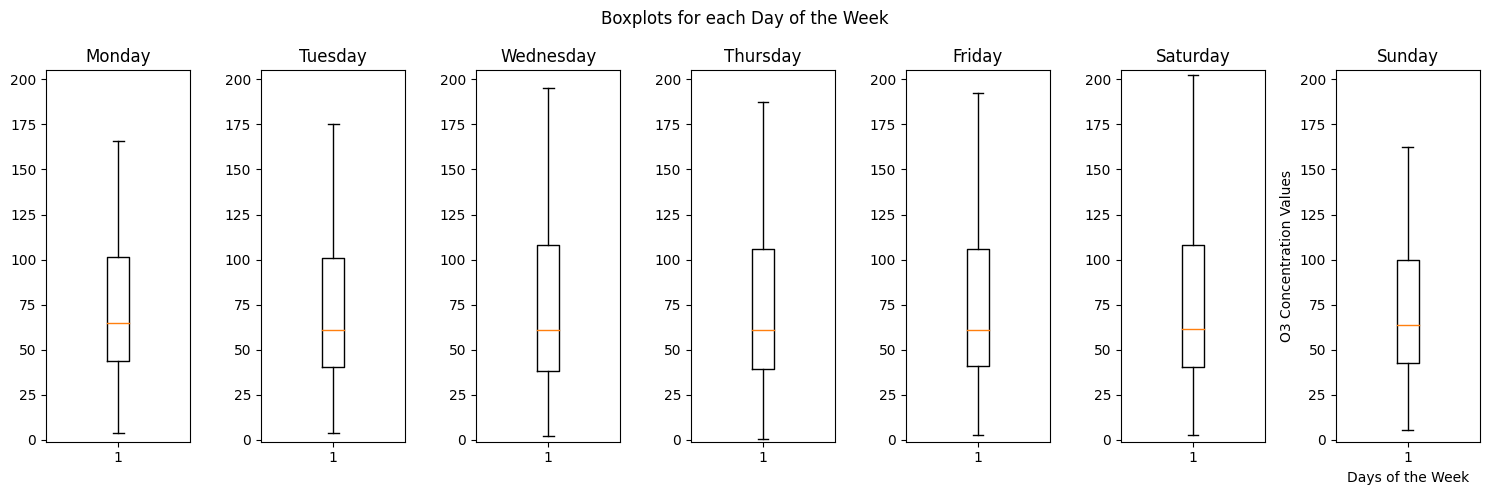

In [23]:
columns_to_plot = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a figure and axis object
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot boxplots
for i, column in enumerate(columns_to_plot):
    axs[i].boxplot(comparison[column])
    axs[i].set_title(column)

    # Set y-axis limits
    axs[i].set_ylim(-1, 205)  # Adjust the limits as needed

# Add labels and title
plt.xlabel('Days of the Week')
plt.ylabel('O3 Concentration Values')
plt.suptitle('Boxplots for each Day of the Week')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Small differences between the descriptions of each Day, could be further analyzed.

# Grouping for days 01-10, 11-20, 21-31

In [24]:
data_sub1 = data[data['Day'] < 11]
data_sub2 = data[(data['Day'] > 10) & (data['Day'] < 21)]
data_sub3 = data[data['Day'] > 20]

In [25]:
describe_sub1 = data_sub1['Concentration'].describe()
describe_sub2 = data_sub2['Concentration'].describe()
describe_sub3 = data_sub3['Concentration'].describe()

In [26]:
describe_sub1 = pd.DataFrame(describe_sub1)
describe_sub2 = pd.DataFrame(describe_sub2)
describe_sub3 = pd.DataFrame(describe_sub3)

comparison = pd.concat([describe_sub1['Concentration'], describe_sub2['Concentration'], describe_sub3['Concentration']], axis=1)
comparison.columns = ['Days 01-10', 'Days 11-20', 'Days 21-31']

comparison

,Days 01-10,Days 11-20,Days 21-31
count,1407.000000,1408.000000,1459.000000
mean,63.754886,61.077326,64.672336
std,28.160980,25.491147,29.824533
min,2.062500,2.625000,0.375000
25%,46.343750,44.500000,45.562500
50%,61.062500,59.625000,61.875000
75%,78.406250,76.375000,79.781250
max,198.937500,195.250000,202.312500


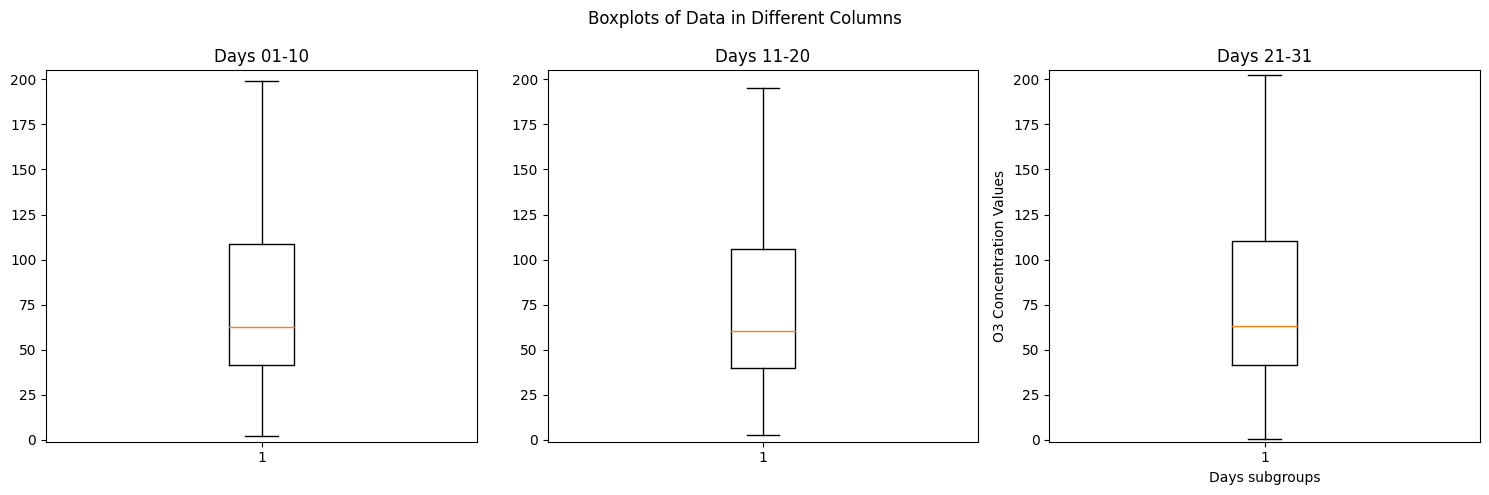

In [27]:
columns_to_plot = ['Days 01-10', 'Days 11-20', 'Days 21-31']

# Create a figure and axis object
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot boxplots
for i, column in enumerate(columns_to_plot):
    axs[i].boxplot(comparison[column])
    axs[i].set_title(column)

    # Set y-axis limits
    axs[i].set_ylim(-1, 205)  # Adjust the limits as needed

# Add labels and title
plt.xlabel('Days subgroups')
plt.ylabel('O3 Concentration Values')
plt.suptitle('Boxplots of Data in Different Columns')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Grouping for Season

In [28]:
data_winter = data[data['Season'] == 1]
data_spring = data[data['Season'] == 2]
data_summer = data[data['Season'] == 3]
data_autumn = data[data['Season'] == 4]

In [29]:
describe_winter = data_winter['Concentration'].describe()
describe_spring = data_spring['Concentration'].describe()
describe_summer = data_summer['Concentration'].describe()
describe_autumn = data_autumn['Concentration'].describe()

In [30]:
describe_winter = pd.DataFrame(describe_winter)
describe_spring = pd.DataFrame(describe_spring)
describe_summer = pd.DataFrame(describe_summer)
describe_autumn = pd.DataFrame(describe_autumn)

comparison = pd.concat([describe_winter['Concentration'], describe_spring['Concentration'], describe_summer['Concentration'], describe_autumn['Concentration']], axis=1)
comparison.columns = ['Winter', 'Spring', 'Summer', 'Autumn']

comparison

,Winter,Spring,Summer,Autumn
count,1060.000000,1068.000000,1084.000000,1062.000000
mean,44.781663,77.807350,81.316305,48.345810
std,17.703449,20.302098,29.676542,20.202974
min,2.062500,4.937500,6.312500,0.375000
25%,32.375000,65.921875,60.296875,35.578125
50%,47.625000,77.000000,74.625000,48.625000
75%,58.328125,87.937500,96.687500,60.000000
max,82.062500,151.250000,202.312500,133.750000


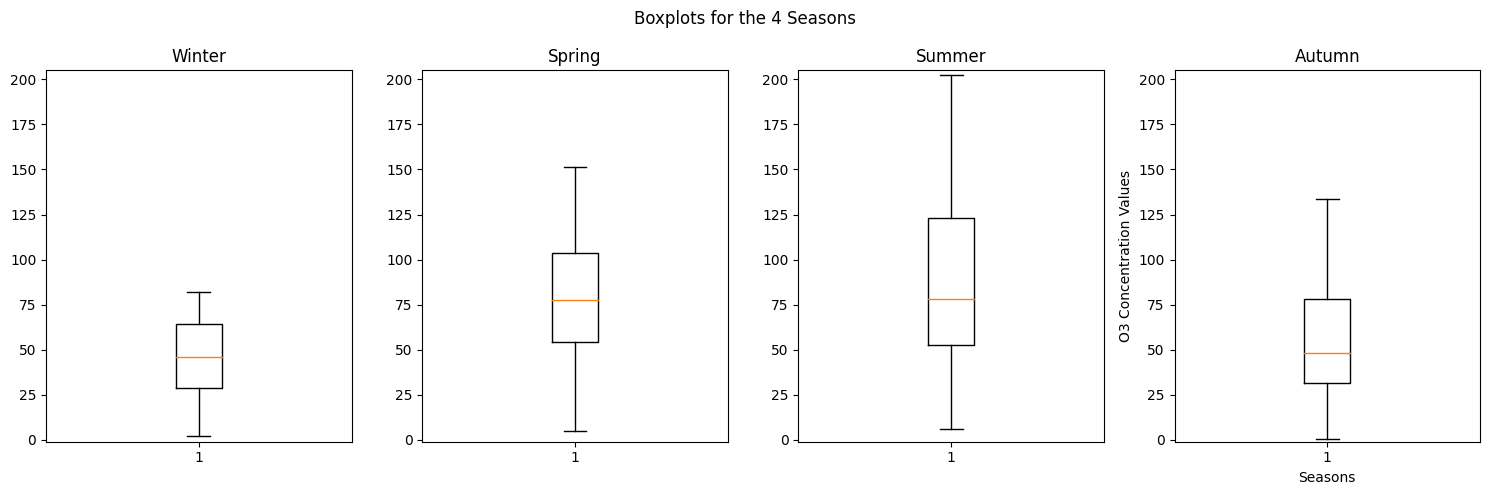

In [31]:
columns_to_plot = ['Winter', 'Spring', 'Summer', 'Autumn']

# Create a figure and axis object
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot boxplots
for i, column in enumerate(columns_to_plot):
    axs[i].boxplot(comparison[column])
    axs[i].set_title(column)

    # Set y-axis limits
    axs[i].set_ylim(-1, 205)  # Adjust the limits as needed

# Add labels and title
plt.xlabel('Seasons')
plt.ylabel('O3 Concentration Values')
plt.suptitle('Boxplots for the 4 Seasons')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Much higher Ozone Values in Summer compared to the rest of the seasons, while the O3 concentration values are higher in Spring than in Winter and Autumn. This should indicate that the Season Variable is significant and should lead to better predictions. These observed variations can be validates by looking at the graph below, where a yearly spike in O3 concentration can be seen in the BETN073 station measurements.

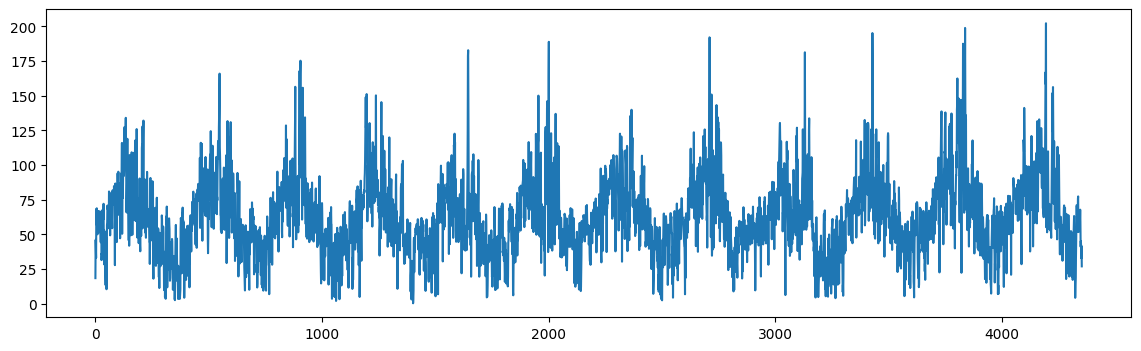

In [32]:
data_a = data.copy()
data_a['Concentration'] = data_a['Concentration'].interpolate(method='linear')
columns_to_drop = ['Year', 'Month', 'Day', 'DayOfWeek', 'Weekend', 'Season', 'IsHoliday']
data_a = data_a.drop(columns=columns_to_drop)
plt.figure(figsize=(14,4))
plt.plot(data_a.Concentration)

# Grouping for Holidays

In [33]:
data_hol = data[data['IsHoliday'] == 1]
data_nohol = data[data['IsHoliday'] == 0]

In [34]:
describe_hol = data_hol['Concentration'].describe()
describe_nohol = data_nohol['Concentration'].describe()

In [35]:
describe_hol = pd.DataFrame(describe_hol)
describe_nohol = pd.DataFrame(describe_nohol)

comparison = pd.concat([describe_hol['Concentration'], describe_nohol['Concentration']], axis=1)
comparison.columns = ['Is a Holiday in Belgium', 'Not a Holiday in Belgium']

comparison

,Is a Holiday in Belgium,Not a Holiday in Belgium
count,387.000000,3887.000000
mean,62.905039,63.213966
std,26.555262,28.079195
min,3.500000,0.375000
25%,45.187500,45.312500
50%,60.625000,60.937500
75%,78.843750,78.375000
max,195.250000,202.312500


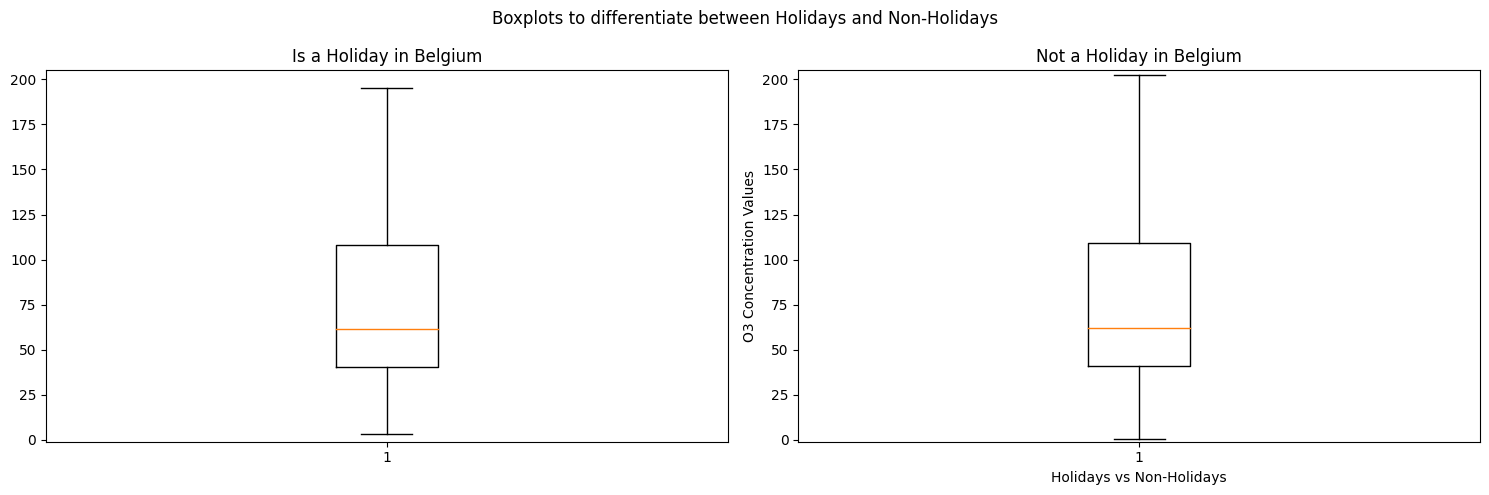

In [36]:
columns_to_plot = ['Is a Holiday in Belgium', 'Not a Holiday in Belgium']

# Create a figure and axis object
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot boxplots
for i, column in enumerate(columns_to_plot):
    axs[i].boxplot(comparison[column])
    axs[i].set_title(column)

    # Set y-axis limits
    axs[i].set_ylim(-1, 205)  # Adjust the limits as needed

# Add labels and title
plt.xlabel('Holidays vs Non-Holidays')
plt.ylabel('O3 Concentration Values')
plt.suptitle('Boxplots to differentiate between Holidays and Non-Holidays')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

No clear differences in boxplots, and can only see that the maximum and minimum values for the holidays are less extreme. From this short analysis, cannot indicate this Variable is needed.

# Grouping for Weekend or non-Weekend

In [37]:
data_weekend = data[data['Weekend'] == 1]
data_notweekend = data[data['Weekend'] == 0]

In [38]:
describe_weekend = data_weekend['Concentration'].describe()
describe_notweekend = data_notweekend['Concentration'].describe()

describe_weekend = pd.DataFrame(describe_weekend)
describe_notweekend = pd.DataFrame(describe_notweekend)

comparison = pd.concat([describe_weekend['Concentration'], describe_notweekend['Concentration']], axis=1)
comparison.columns = ['Data for a Working Day', 'Data for Weekends']

comparison

,Data for a Working Day,Data for Weekends
count,1229.000000,3045.000000
mean,65.335588,62.318391
std,25.243446,28.918441
min,4.062500,0.375000
25%,49.187500,44.125000
50%,63.125000,60.062500
75%,79.500000,78.000000
max,166.000000,202.312500


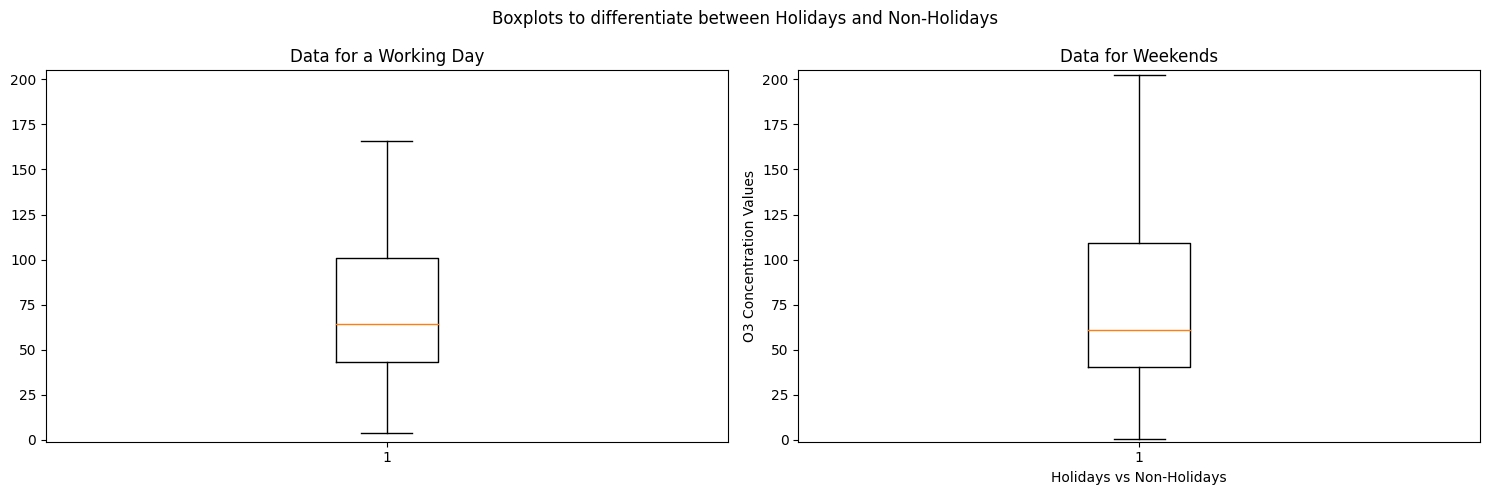

In [39]:
columns_to_plot = ['Data for a Working Day', 'Data for Weekends']

# Create a figure and axis object
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot boxplots
for i, column in enumerate(columns_to_plot):
    axs[i].boxplot(comparison[column])
    axs[i].set_title(column)

    # Set y-axis limits
    axs[i].set_ylim(-1, 205)  # Adjust the limits as needed

# Add labels and title
plt.xlabel('Holidays vs Non-Holidays')
plt.ylabel('O3 Concentration Values')
plt.suptitle('Boxplots to differentiate between Holidays and Non-Holidays')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()